<img width="8%" alt="Naas.png" src="https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/.github/assets/logos/Naas.png" style="border-radius: 15%">

# Tool - Action of the notebook

**Tags:** #tool

**Author:** [Firstname Lastname](https://www.linkedin.com/)

**Last update:** YYYY-MM-DD (Created: YYYY-MM-DD)

**Description:** This notebook demonstrates how to ... -> a one-liner explaining the benefits of the notebooks for the user, as text.

**References:**
- [Naas Documentation](https://site.naas.ai/)

## Input

### Import libraries
Libraries to be used within the notebook.<br>
If these libraries are not installed on Naas, ensure they are installed during the first execution by using a `try`/`except` function to import the package.

In [3]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame

In [4]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

### Setup variables
Variables used in this notebook should be categorized as either mandatory or optional and should be clearly described. The aim of defining these variables in the input section is to facilitate use of the notebook by any user, allowing them to interact with it without the need to modify functions in the model section.


**Mandatory**

- `stock_name`: This variable represents the stock symbol for which you want to fetch data. In this case, 'NFLX' stands for Netflix.


**Optional**

- `date_from`: This variable defines the starting date from which you want to fetch the stock data. It's set to '-3600', which likely represents 3600 days before the current date.
- `date_to`: This variable defines the end date up to which you want to fetch the stock data. When set to 'today', it fetches data up to the current date.
- `moving_averages`: This is a list of integers representing the number of days for which you want to calculate the moving average of the stock price. In this case, moving averages will be calculated for the past 20 and 50 days.
- `csv_output`: This variable represents the name of the CSV file where the fetched data will be saved. In this case, the file will be named 'MY_OUTPUT.csv'.

In [13]:
# get data from text file
df = pd.read_csv("dataset.csv")

#drop ID column
df = df.drop(df.columns[0], axis=1)

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


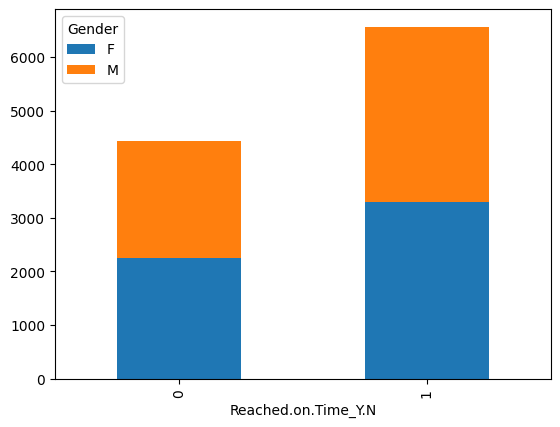

Chi-squared statistic: [0.86654644 0.12814262]
p-value: [0.35191318 0.72036566]


In [26]:
from scipy.stats import chisquare

gender_vs_time = df.groupby(['Gender', 'Reached.on.Time_Y.N']).size().unstack().T


gender_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

#probably drop gender, roughly equal

tab = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

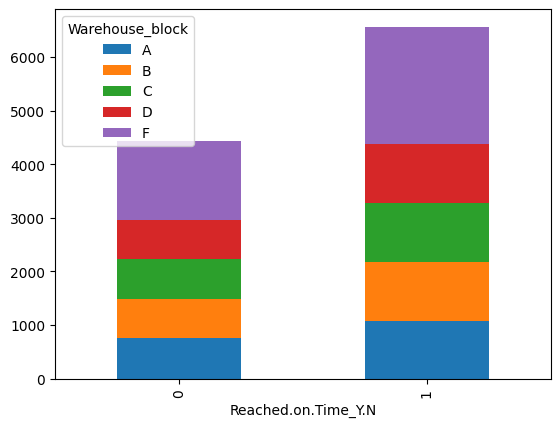

Chi-squared statistic: [482.34310189 740.16090203]
p-value: [4.41214072e-103 7.00761672e-159]


In [28]:
ware_vs_time = df.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).size().unstack().T


ware_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

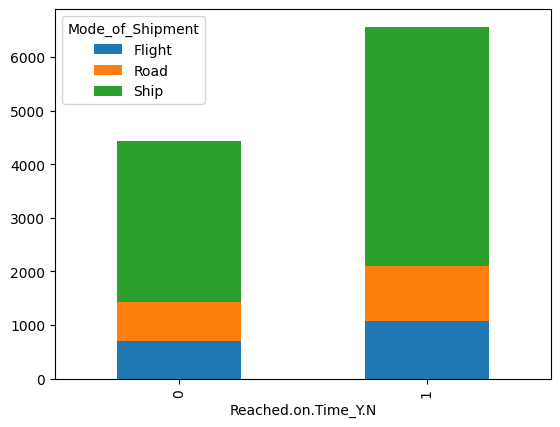

Chi-squared statistic: [2357.21325518 3537.56391894]
p-value: [0. 0.]


In [32]:
mode_vs_time = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack().T


mode_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

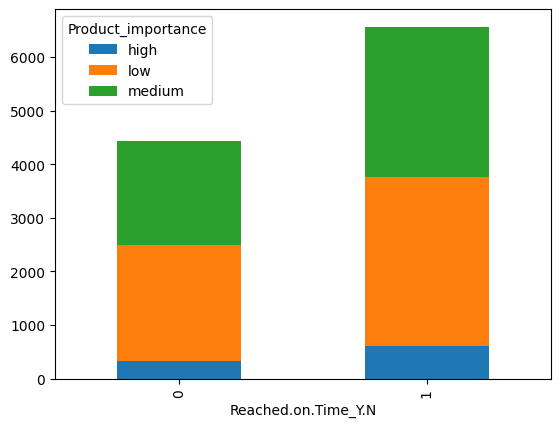

Chi-squared statistic: [1348.72633003 1719.02270303]
p-value: [1.34214252e-293 0.00000000e+000]


In [33]:
importance_vs_time = df.groupby(['Product_importance', 'Reached.on.Time_Y.N']).size().unstack().T
importance_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

## Model

In [34]:
#Dropping Gender, Customer Rating, Customer_care_calls, Prior Purchases
df = df.drop(df.columns[0], axis=1)
columns_to_drop = ['Gender', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases']
df = df.drop(columns=columns_to_drop)

df.head()

,Mode_of_Shipment,Cost_of_the_Product,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,Flight,177,low,44,1233,1
1,Flight,216,low,59,3088,1
2,Flight,183,low,48,3374,1
3,Flight,176,medium,10,1177,1
4,Flight,184,medium,46,2484,1


In [36]:
df_one_hot = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, dtype=int)
df_one_hot

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,177,44,1233,1,1,0,0,0,1,0
1,216,59,3088,1,1,0,0,0,1,0
2,183,48,3374,1,1,0,0,0,1,0
3,176,10,1177,1,1,0,0,0,0,1
4,184,46,2484,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10994,252,1,1538,1,0,0,1,0,0,1
10995,232,6,1247,0,0,0,1,0,0,1
10996,242,4,1155,0,0,0,1,0,1,0
10997,223,2,1210,0,0,0,1,0,0,1


### Get data from yahoo finance

In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#Extract features and labels
features = df_one_hot.drop(columns=['Reached.on.Time_Y.N'])

label = df_one_hot['Reached.on.Time_Y.N']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])


# Define the parameters to test w/ nested CV
param_grid = {'knn__n_neighbors': [2, 3, 5, 7, 9, 12], 'knn__weights': ['uniform', 'distance'], 'pca': [None, PCA(n_components=0.8), PCA(n_components=0.85), PCA(n_components=0.9), PCA(n_components=0.95)]}

# Both CV folds
outer_cv = StratifiedKFold(n_splits=5)
inner_cv = StratifiedKFold(n_splits=3)

# Get nested CV score
grid_search = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='accuracy')
nested_score = cross_val_score(grid_search, features, label, cv=outer_cv, scoring='accuracy')

# Print the nested cross-validation scores
print("Nested CV Accuracy: %0.2f (+/- %0.2f)" % (nested_score.mean(), nested_score.std() * 2))


Nested CV Accuracy: 0.60 (+/- 0.32)


In [53]:
from sklearn.metrics import accuracy_score
#60% isn't that great... but that's okay
grid_search.fit(features, label)

# Obtain the best estimator (final model) from the grid search object
best_model = grid_search.best_estimator_

label_pred = best_model.predict(features)

accuracy = accuracy_score(label, label_pred)

print("Accuracy on the entire dataset:", accuracy)

Accuracy on the entire dataset: 0.816528775343213


## Output

### Save DataFrame to csv

In [ ]:
df.to_csv(csv_output, index=False)